In [13]:
import pandas as pd
# Load and preprocess data
df = pd.read_csv("feature_target.dat", sep=" ", )

df = df.dropna(axis=1)
# df_clean = df.drop(columns=['Unnamed: 0',])  # Drop non-numeric columns "formula"

# Define features and target
X = df_clean.drop(columns=["diff_coeff_mul_thousand"])
y = df_clean["diff_coeff_mul_thousand"]

In [41]:
test_df = pd.read_csv("test_ordered.dat", sep=" ", )


import numpy as np

# Assuming 'df' is your DataFrame and it has a column named 'diff_coeff_mul_thousand'
test_df['lnD'] = np.log(test_df['diff_coeff_mul_thousand'] / 1000) # this is natural logarithm base (e)
kb = 8.617333262145e-5 # eV/K
test_df['inverse_kbT'] = 1 / test_df['temperature'] / kb

In [44]:
ordered_test_df = test_df[['index', 'lnD', 'PF', 'RNC', 'SBI', 'SDLC', 'RBI',
       'ENS', 'SDLI', 'SLPE', 'LLB', 'avg_diff_of_X_Li_rest',
       'ratio_r_without_Li_with', 'SPF', 'LNC', 'AFC', 'Li_percentage', 'LBI',
       'avg_X_with_Li', 'SNC', 'avg_B_wiout_Li', 'avg_G_wiout_Li',
       'avg_B_with_Li', 'avg_X_wiout_Li', 'avg_G_with_Li', 'avg_Ecoh_with_Li',
       'avg_Echo_wiout_Li', 'avg_m_wiout_Li', 'avg_m_with_Li',
       'BR5_M_without_Li', 'GR5_M_without_Li', 'GR5_M_with_Li',
       'BR5_M_with_Li', 'ER2_m_without_Li', 'ER2_m_with_Li',
       'atomic_radius_avg_exclude_Li', 'LASD', 'SLPW', 'LLSD',
       'atomic_radius_avg', 'AASD', 'SLPW_pp', 'VPA', 'AAV',
       'inverse_kbT']]

In [89]:
selected_features = ordered_test_df[['inverse_kbT', 'LNC', 'LBI', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']]

import pandas as pd
import numpy as np

def predict_from_dataframe(df):
    """
    Predict the output using the 5D model from a pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the columns:
                           ['inverse_kbT', 'LNC', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']
                              
    Returns:
    pandas.Series: The predicted values.
    """
    # Coefficients
    # coefficients = np.array([-0.3356149950, -0.1021073203, 0.1434390920, -0.3700377675, -2.312115624])
    # intercept = -3.457205096
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT', 'LNC', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']].values
#   model with 6 dimensions
    # Coefficients
    coefficients = np.array([-0.3355435360E+00 ,  -0.1314824709E+00 ,   0.3833376979E+00  ,
      0.1875617927E+00  , -0.5291494250E+00  , -0.1999504094E+01])
    intercept = -0.3649632303E+01
    
    # Extract features from the DataFrame
    features = df[['inverse_kbT', 'LNC','LBI', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']].values    
    
    # Calculate the predictions
    predictions = np.dot(features, coefficients) + intercept
    return pd.Series(predictions, index=df.index)


# Example usage:
predictions_6D = predict_from_dataframe(ordered_test_df)
predictions_6D


0     -8.192513
1     -8.766374
2     -8.067163
3     -8.328688
4     -8.555633
         ...   
114   -9.364142
115   -7.374441
116   -6.859978
117   -7.447465
118   -7.329698
Length: 119, dtype: float64

<AxesSubplot:title={'center':'Predicted vs. Actual lnD'}, xlabel='lnD', ylabel='Predicted_lnD'>

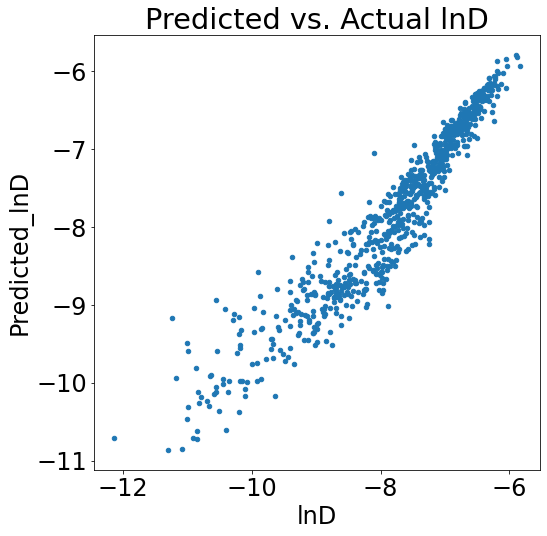

In [90]:


# ordered_test_df[['lnD']]

predictions = predict_from_dataframe(ordered_df)

# Compare predictions with actual lnD values
comparison_df = ordered_df[['lnD']].copy()
comparison_df['Predicted_lnD'] = predictions
comparison_df.plot(x='lnD', y='Predicted_lnD', kind='scatter', title='Predicted vs. Actual lnD')


<AxesSubplot:title={'center':'Predicted vs. Actual lnD'}, xlabel='lnD', ylabel='Predicted_lnD'>

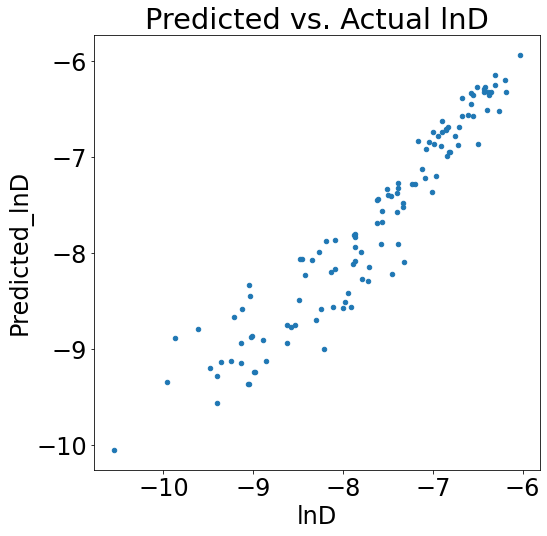

In [97]:
predict_results

,inverse_kbT,LNC,LBI,LLB,avg_diff_of_X_Li_rest,PF,lnD,Predicted_lnD
0,7.736345,13.4706,0.6712,3.8235,0.3117,0.4928,-8.134315,-8.192513
1,7.736345,22.7778,1.6616,5.0000,0.4667,0.4270,-8.581732,-8.766374
2,5.802259,21.0000,1.8605,1.6667,0.1120,0.3381,-8.349985,-8.067163
3,7.736345,16.0750,0.5460,6.5500,0.3680,0.6065,-9.042287,-8.328688
4,11.604518,14.3333,0.2146,11.3571,0.8267,0.4514,-8.114064,-8.555633
...,...,...,...,...,...,...,...,...
114,11.604518,14.5143,0.6135,4.3429,0.2900,0.4044,-9.055047,-9.364142
115,4.641807,18.1667,2.0942,0.3333,0.1174,0.2910,-7.403364,-7.374441
116,5.802259,11.8000,0.7727,5.7600,0.7470,0.3467,-6.987665,-6.859978
117,7.736345,10.8235,0.4358,6.6176,0.7467,0.3961,-7.625605,-7.447465


fm_six_dim_5
fm_six_dim_5
fm_six_dim_2
fm_six_dim_2
fm_six_dim_3
fm_six_dim_3
fm_six_dim_4
fm_six_dim_4
fm_six_dim_1
fm_six_dim_1
fm_six_dim_6
fm_six_dim_6
fm_six_dim_7
fm_six_dim_7


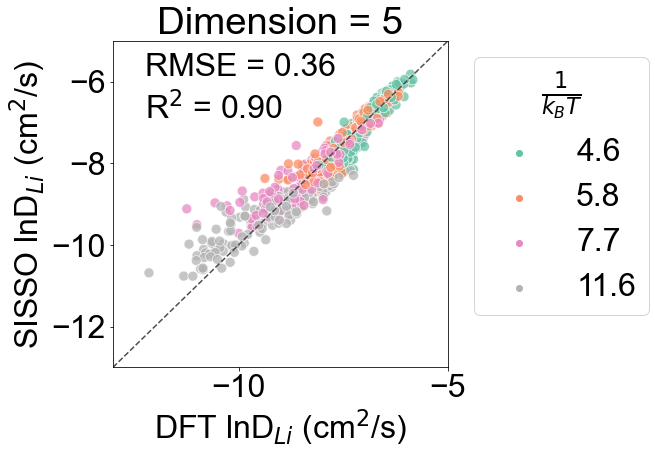

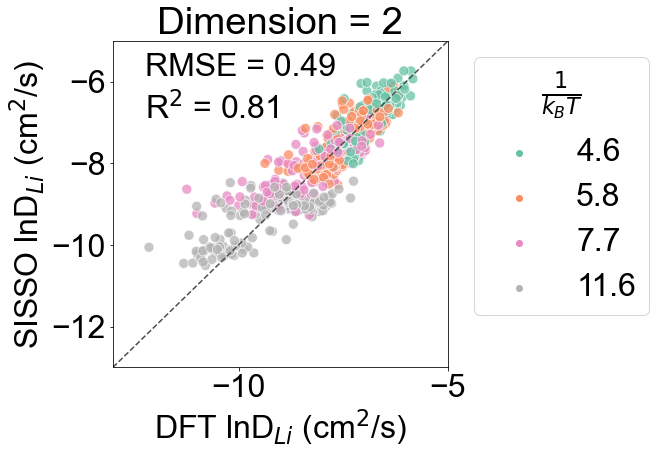

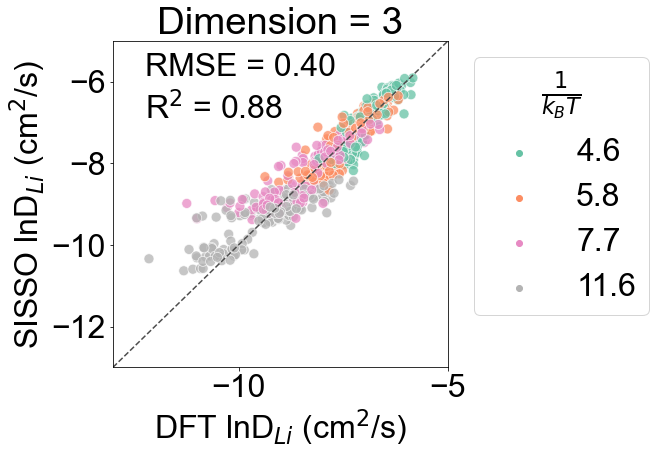

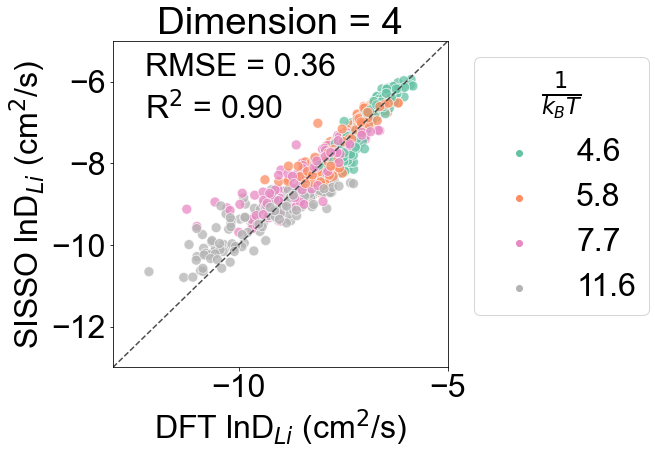

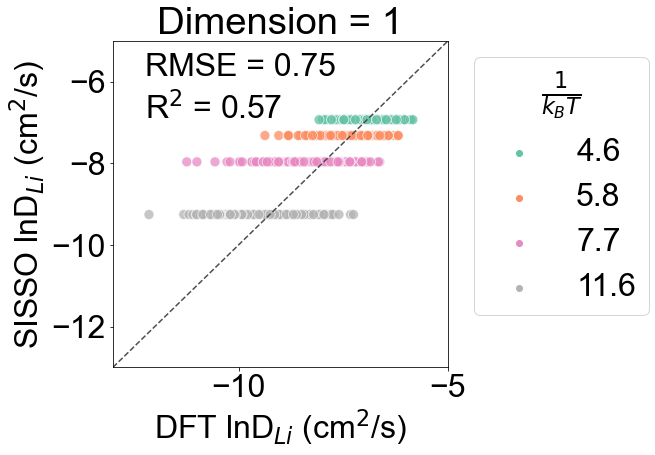

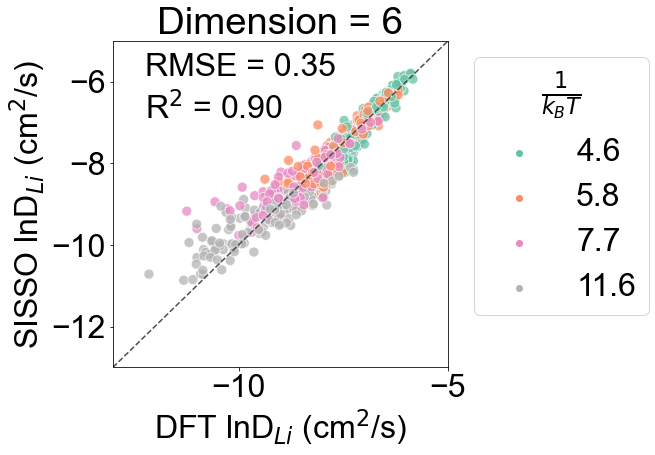

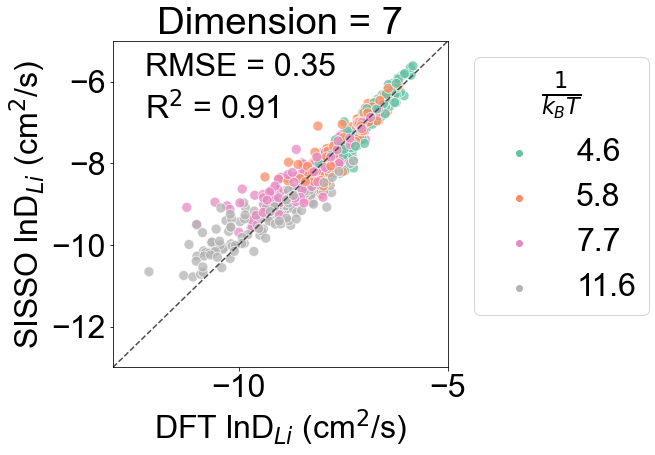

In [129]:


from matplotlib import rc
import matplotlib.pyplot as plt
font = {'size'   : 32}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = 8, 8 

main = 'new_training_Arrhenius_relation'

dest = '/new_training_Arrhenius_relation/sisso_plots'
os.chdir(dest)


for i, path in enumerate (glob.glob(main + '/fm_six_dim_*')):
    
    # fig, ax = plt.subplots(figsize=(8, 6))
    base = os.path.basename(path) # os.path.basename(f).split('.')[0]
    print(base)
    dimension = base.split('_')[-1]
    file = os.path.join(path, 'desc_dat', f'desc_D00{dimension}_t001.dat') # desc_D002_t001.dat
    fig, ax = plt.subplots(1,1, figsize=(6, 6))       
    ddfff = pd.read_csv(file,  sep='\s+', ) #   delim_whitespace=True
    r2 = mtc.r2_score(ddfff['y_true'], ddfff['y_pred'], 
                         sample_weight=None, multioutput='uniform_average')
    # mse = mtc.mean_squared_error()
    rmse = mtc.mean_squared_error(ddfff['y_true'], ddfff['y_pred'], squared=False)
    # rmse = mtc.root_mean_squared_error(ddfff['y_true'], ddfff['y_pred'],)

    ax = sns.scatterplot(data=ddfff, 
                        x='y_true', 
                        y='y_pred',
                        hue='descriptor_1',
                        # size="descriptor_1",
                        s=100,  # Marker size                         
                        sizes=(100, 350), 
                         alpha=0.75,
                         palette=sns.color_palette('Set2', as_cmap=True), 

                        )

    
#     ax.set(xlim=(min(ddfff['y_measurement']), max(ddfff['y_measurement'])), 
#            ylim=(min(ddfff['y_fitting']), max(ddfff['y_fitting'])))
    ax.plot([-13, -5], [-13, -5], ls="--", c=".3")
    ax.set(xlim=(-13, -5), ylim=(-13, -5))

    ax.set_xlabel(r'DFT lnD$_{Li}$ (cm$^2$/s)')
    # ax.set_xlabel(r'Calculated E$_a$ (eV)')
    # ax.set_xlabel(r'Calculated D (x10$^{-3}$cm$^2$/s)',)
    
    print(base)
    # fig.text(0.3, 0.9, base)
    fig.text(0.2, 0.8, 'RMSE = %.2f' %rmse)
    fig.text(0.2, 0.7, r'R$^2$ = %.2f' %r2)

    # ax.set_ylabel('Weighted average atomic radius (Å)')
    ax.set_ylabel(r'SISSO lnD$_{Li}$ (cm$^2$/s)',)
    # ax.set_ylabel(r'Fitted E$_a$ (eV)',)
    ax.set_title('Dimension = %s' % dimension)
    
    # ax.legend(title=r'$\frac{1}{k_BT}$', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    # Set the legend title with LaTeX formatting
    handles, labels = ax.get_legend_handles_labels()
    labels = [f'{float(label):.1f}' for label in labels[:]]  # Format labels to 1 decimal place
    ax.legend(handles=handles[:], labels=labels, title=r'$\frac{1}{k_BT}$', bbox_to_anchor=(1.03, 1), loc='upper left', ncol=1)

#     plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

    fig = ax.get_figure()
    fig.savefig('lnD_vs_inverse_kbT_%s_fm_six.pdf' %base, bbox_inches='tight')
    # break






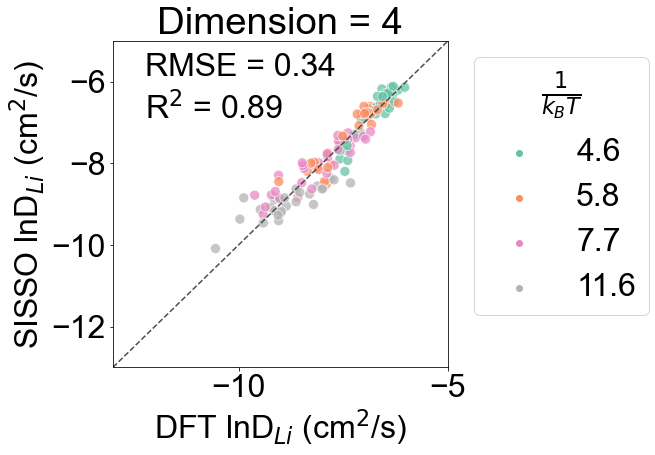

In [130]:

import os, glob
import seaborn as sns

from maggma.stores.mongolike import MongoStore, SSHTunnel
from pymatgen.core import Composition,Element
import numpy as np
import json
import pandas as pd
import matplotlib
import os, glob, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as mtc

from matplotlib import rc
import matplotlib.pyplot as plt
font = {'size'   : 32}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = 8, 8

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"


import pandas as pd
import numpy as np
dimension = 4
base = 'sixth'
def predict_from_dataframe(df):
    """
    Predict the output using the 5D model from a pandas DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the columns:
                           ['inverse_kbT', 'LNC', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']
                              
    Returns:
    pandas.Series: The predicted values.
    """
    # Coefficients
    # coefficients = np.array([-0.3356149950, -0.1021073203, 0.1434390920, -0.3700377675, -2.312115624])
    # intercept = -3.457205096
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT', 'LNC', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']].values

# Model with 1 dimension
    # coefficients = np.array([-0.3339783615E+00])
    # intercept = -0.5377207266E+01
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT']].values  

# Model with 2 dimensions
    # coefficients = np.array([-0.3279301133E+00 ,  -0.1103637861E+00])
    # intercept = -0.3656538958E+01
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT', 'LNC',]].values    

# Model with 4 dimensions
    coefficients = np.array([-0.3339406718E+00 ,  -0.1064562223E+00 ,   0.1124328014E+00 ,  -0.1946232403E+01])
    intercept = -0.3550389618E+01
    
    # Extract features from the DataFrame
    features = df[['inverse_kbT', 'LNC', 'LLB', 'PF']].values   

# # Model with 3 dimensions
    # coefficients = np.array([-0.3389902594E+00 ,  -0.8221510295E-01 ,   0.1330504015E+01])
    # intercept = -0.4662173223E+01
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT', 'LNC', 'Li_percentage']].values    


# #   model with 6 dimensions
    # Coefficients
    # coefficients = np.array([-0.3355435360E+00 ,  -0.1314824709E+00 ,   0.3833376979E+00  ,
    #   0.1875617927E+00  , -0.5291494250E+00  , -0.1999504094E+01])
    # intercept = -0.3649632303E+01
    
    # # Extract features from the DataFrame
    # features = df[['inverse_kbT', 'LNC','LBI', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']].values    
    
    # Calculate the predictions
    predictions = np.dot(features, coefficients) + intercept
    return pd.Series(predictions, index=df.index)


# Example usage:


predictions = predict_from_dataframe(ordered_test_df)

# Compare predictions with actual lnD values
comparison_df = ordered_test_df[['lnD']].copy() # initial data of lnD
comparison_df['Predicted_lnD'] = predictions # predicted lnD from SISSO 6D model
# comparison_df.plot(x='lnD', y='Predicted_lnD', kind='scatter', title='Predicted vs. Actual lnD')

selected_features = ordered_test_df[['inverse_kbT', 'LNC', 'LBI', 'LLB', 'avg_diff_of_X_Li_rest', 'PF']]
predict_results = pd.concat([selected_features, comparison_df], axis=1)

# predict_results.plot(x='lnD', y='Predicted_lnD', kind='scatter', title='Predicted vs. Actual lnD')


fig, ax = plt.subplots(1,1, figsize=(6, 6))        
# predict_results = pd.read_csv(f, delim_whitespace=True)
r2 = mtc.r2_score(predict_results['lnD'], predict_results['Predicted_lnD'], 
                        sample_weight=None, multioutput='uniform_average')
# mse = mtc.mean_squared_error()
rmse = mtc.mean_squared_error(predict_results['lnD'], predict_results['Predicted_lnD'], squared=False)


ax = sns.scatterplot(data=predict_results, 
                    x='lnD', 
                    y='Predicted_lnD',
                    hue='inverse_kbT',
                    # size="descriptor_1",
                    s=100,  # Marker size                         
                    sizes=(100, 350), 
                        alpha=0.75,
                        palette=sns.color_palette('Set2', as_cmap=True), 
                    )

ax.plot([-13, -5], [-13, -5], ls="--", c=".3")
ax.set(xlim=(-13, -5), ylim=(-13, -5))

ax.set_xlabel(r'DFT lnD$_{Li}$ (cm$^2$/s)')

fig.text(0.2, 0.8, 'RMSE = %.2f' %rmse)
fig.text(0.2, 0.7, r'R$^2$ = %.2f' %r2)

ax.set_ylabel(r'SISSO lnD$_{Li}$ (cm$^2$/s)',)
# ax.set_ylabel(r'Fitted E$_a$ (eV)',)
ax.set_title('Dimension = %s' % dimension)

# ax.legend(title=r'$\frac{1}{k_BT}$', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
# Set the legend title with LaTeX formatting
handles, labels = ax.get_legend_handles_labels()
labels = [f'{float(label):.1f}' for label in labels[:]]  # Format labels to 1 decimal place
ax.legend(handles=handles[:], labels=labels, title=r'$\frac{1}{k_BT}$', bbox_to_anchor=(1.03, 1), loc='upper left', ncol=1)

#     plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

fig = ax.get_figure()
fig.savefig('lnD_vs_inverse_kbT_%s_predict_%sD.pdf' % (base, dimension), bbox_inches='tight')
# break




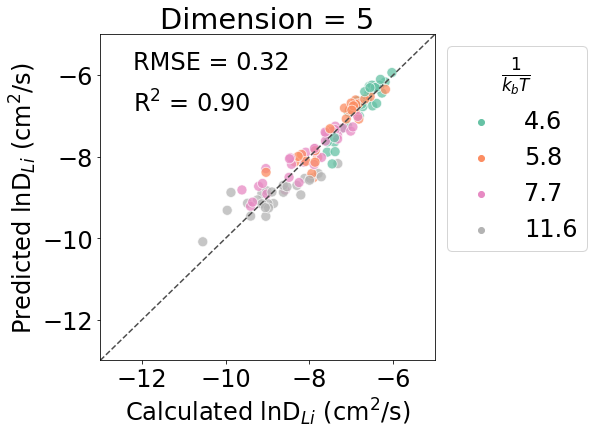

In [83]:
import os, glob
import seaborn as sns

from maggma.stores.mongolike import MongoStore, SSHTunnel
from pymatgen.core import Composition,Element
import numpy as np
import json
import pandas as pd
import matplotlib
import os, glob, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as mtc

from matplotlib import rc
import matplotlib.pyplot as plt
font = {'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = 8, 8

dimension = 5
base = 'sixth'

fig, ax = plt.subplots(1,1, figsize=(6, 6))        
# predict_results = pd.read_csv(f, delim_whitespace=True)
r2 = mtc.r2_score(predict_results['lnD'], predict_results['Predicted_lnD'], 
                        sample_weight=None, multioutput='uniform_average')
# mse = mtc.mean_squared_error()
rmse = mtc.mean_squared_error(predict_results['lnD'], predict_results['Predicted_lnD'], squared=False)


ax = sns.scatterplot(data=predict_results, 
                    x='lnD', 
                    y='Predicted_lnD',
                    hue='inverse_kbT',
                    # size="descriptor_1",
                    s=100,  # Marker size                         
                    sizes=(100, 350), 
                        alpha=0.75,
                        palette=sns.color_palette('Set2', as_cmap=True), 
                    )


#     ax.set(xlim=(min(predict_results['y_measurement']), max(predict_results['y_measurement'])), 
#            ylim=(min(predict_results['y_fitting']), max(predict_results['y_fitting'])))
ax.plot([-13, -5], [-13, -5], ls="--", c=".3")
ax.set(xlim=(-13, -5), ylim=(-13, -5))

ax.set_xlabel(r'Calculated lnD$_{Li}$ (cm$^2$/s)')

fig.text(0.2, 0.8, 'RMSE = %.2f' %rmse)
fig.text(0.2, 0.7, r'R$^2$ = %.2f' %r2)

ax.set_ylabel(r'Predicted lnD$_{Li}$ (cm$^2$/s)',)
# ax.set_ylabel(r'Fitted E$_a$ (eV)',)
ax.set_title('Dimension = %s' % dimension)

# ax.legend(title=r'$\frac{1}{k_BT}$', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
# Set the legend title with LaTeX formatting
handles, labels = ax.get_legend_handles_labels()
labels = [f'{float(label):.1f}' for label in labels[:]]  # Format labels to 1 decimal place
ax.legend(handles=handles[:], labels=labels, title=r'$\frac{1}{k_bT}$', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

#     plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

fig = ax.get_figure()
fig.savefig('lnD_vs_inverse_kbT_%s_predict.pdf' %base, bbox_inches='tight')
# break




In [15]:
import numpy as np

# Assuming 'df' is your DataFrame and it has a column named 'diff_coeff_mul_thousand'
df['lnD'] = np.log(df['diff_coeff_mul_thousand'] / 1000) # this is natural logarithm base (e)
kb = 8.617333262145e-5 # eV/K
df['inverse_kbT'] = 1 / df['temperature'] / kb

In [54]:
for feature_id in [1, 2, 24, 33, 43]:

    feature_name = ordered_df.columns[2:][feature_id - 1]
    print(feature_name)

PF
RNC
avg_Ecoh_with_Li
ER2_m_with_Li
inverse_kbT


In [37]:
ordered_df = df[['formula', 'lnD', 'PF', 'RNC', 'SBI', 'SDLC', 'RBI',
       'ENS', 'SDLI', 'SLPE', 'LLB', 'avg_diff_of_X_Li_rest',
       'ratio_r_without_Li_with', 'SPF', 'LNC', 'AFC', 'Li_percentage', 'LBI',
       'avg_X_with_Li', 'SNC', 'avg_B_wiout_Li', 'avg_G_wiout_Li',
       'avg_B_with_Li', 'avg_X_wiout_Li', 'avg_G_with_Li', 'avg_Ecoh_with_Li',
       'avg_Echo_wiout_Li', 'avg_m_wiout_Li', 'avg_m_with_Li',
       'BR5_M_without_Li', 'GR5_M_without_Li', 'GR5_M_with_Li',
       'BR5_M_with_Li', 'ER2_m_without_Li', 'ER2_m_with_Li',
       'atomic_radius_avg_exclude_Li', 'LASD', 'SLPW', 'LLSD',
       'atomic_radius_avg', 'AASD', 'SLPW_pp', 'VPA', 'AAV',
       'inverse_kbT']]

In [38]:
ordered_df.to_csv("train_target_lnD_kbT.dat", sep=" ", index=False)

In [45]:
ordered_test_df.to_csv("test_target_lnD_kbT.dat", sep=" ", index=False)

In [31]:
ordered_df

,formula,lnD,PF,RNC,SBI,SDLC,RBI,ENS,SDLI,SLPE,...,atomic_radius_avg_exclude_Li,LASD,SLPW,LLSD,atomic_radius_avg,AASD,SLPW_pp,VPA,AAV,inverseTemp
0,Li2Si2Os,-8.985891,0.537464,1.038968,0.508957,1.422805,1.212127,2.000000,0.507814,1.668000,...,1.166667,2.483663,0.241963,2.471324,1.28,2.947940,1.471777,38.639000,15.455600,0.666667
1,Li2Si2Os,-7.809285,0.530402,1.080135,0.511174,1.395529,1.156878,2.000000,0.514213,1.675000,...,1.166667,2.397119,0.174041,2.458031,1.28,2.779579,1.433028,39.153479,15.661392,0.500000
2,Li2Si2Os,-7.302605,0.507755,0.998270,0.505121,1.715918,1.245370,2.000000,0.505477,1.682500,...,1.166667,2.473848,0.250960,2.384078,1.28,2.894404,1.533619,40.899832,16.359933,0.400000
3,Ba3LiSi6,-9.700728,0.586589,1.047506,0.645606,1.166190,0.809916,1.563333,0.431069,1.101000,...,1.450000,2.510706,-0.114065,3.660104,1.45,2.521960,1.474695,47.746730,28.648038,1.000000
4,Ba3LiSi6,-8.429105,0.565416,1.099237,0.608448,0.916515,0.934907,1.563333,0.425609,1.294000,...,1.450000,2.500149,-0.102564,3.298787,1.45,2.513725,1.412973,49.534649,29.720789,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,SrLi4,-6.030265,0.450057,1.125776,0.027764,1.527610,0.222376,0.950000,0.012131,0.969875,...,2.000000,3.372988,0.649886,2.446103,1.56,4.330706,2.115266,147.086843,29.417369,0.400000
788,SrLi8Si,-7.956939,0.504387,0.962062,0.546031,1.286893,0.186161,1.425000,0.283856,0.969875,...,1.550000,3.692311,0.649886,2.479638,1.47,3.916887,2.115266,212.266044,21.226604,1.000000
789,SrLi8Si,-7.053573,0.491783,1.045833,0.494292,1.540292,0.200958,1.425000,0.280784,1.041500,...,1.550000,3.625281,0.252408,2.424532,1.47,3.866235,1.607995,217.706443,21.770644,0.666667
790,SrLi8Si,-6.622879,0.477672,1.110849,0.515330,1.612258,0.178275,1.425000,0.271123,1.086375,...,1.550000,3.681571,0.434791,2.457550,1.47,4.392096,1.806579,224.137506,22.413751,0.500000


In [34]:
pd.set_option('display.max_columns', None)

ordered_df.describe()


,lnD,PF,RNC,SBI,SDLC,RBI,ENS,SDLI,SLPE,LLB,avg_diff_of_X_Li_rest,ratio_r_without_Li_with,SPF,LNC,AFC,Li_percentage,LBI,avg_X_with_Li,SNC,avg_B_wiout_Li,avg_G_wiout_Li,avg_B_with_Li,avg_X_wiout_Li,avg_G_with_Li,avg_Ecoh_with_Li,avg_Echo_wiout_Li,avg_m_wiout_Li,avg_m_with_Li,BR5_M_without_Li,GR5_M_without_Li,GR5_M_with_Li,BR5_M_with_Li,ER2_m_without_Li,ER2_m_with_Li,atomic_radius_avg_exclude_Li,LASD,SLPW,LLSD,atomic_radius_avg,AASD,SLPW_pp,VPA,AAV,inverseTemp
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,-7.805855,0.473403,1.029072,0.759596,1.660902,1.028000,2.246852,0.628421,1.774911,7.083628,0.532303,0.916344,0.230409,15.989397,3.943962,0.478001,0.745436,1.714550,15.677825,71.337021,59.966171,38.471843,2.246852,34.775591,2.722451,3.833396,61.563839,30.405248,1.679178,1.384588,1.632974,2.127045,0.309582,0.394272,1.171958,2.909891,0.245025,2.623340,1.263200,3.536769,1.406874,117.279950,17.917709,0.626641
std,1.136039,0.108109,0.102793,0.322570,0.401426,0.772203,0.612592,0.311090,0.559977,3.493360,0.320555,0.116253,0.121247,5.088010,2.191121,0.245567,0.584233,0.583556,5.113785,64.888697,128.427995,24.632224,0.612592,89.000394,0.723023,1.267183,39.654361,15.295139,1.034944,1.288497,1.291501,1.010644,0.074648,0.086974,0.320247,0.603053,0.183100,0.374737,0.226246,0.746316,0.316491,104.873958,6.467962,0.220718
min,-12.139499,0.151789,0.819820,0.024754,0.840683,0.151673,0.820000,0.011266,0.892941,0.200000,-0.106667,0.514286,0.027275,4.821429,1.000000,0.055556,0.005095,0.926667,3.264706,1.000000,1.000000,5.875000,0.820000,2.000000,1.332521,0.784381,14.006700,8.707425,0.117769,0.089362,0.149054,0.213073,0.146574,0.199437,0.571429,1.754208,-0.525615,2.059612,0.681250,2.154732,0.548546,16.388419,9.053564,0.400000
25%,-8.495191,0.412048,0.995019,0.527955,1.383499,0.325367,1.810000,0.399533,1.321305,4.074359,0.280000,0.855978,0.143493,12.549405,2.428571,0.250000,0.247987,1.220000,12.345833,28.583333,12.750000,20.550000,1.810000,7.750000,2.161280,3.139834,30.212937,20.111714,0.727836,0.492840,0.850485,1.231395,0.253514,0.341469,0.850000,2.556432,0.139872,2.388855,1.065625,2.961457,1.120550,53.577870,12.494632,0.400000
50%,-7.581449,0.473374,1.020208,0.763973,1.564934,0.851293,2.056429,0.493183,1.622475,7.546218,0.466667,0.925795,0.206515,14.216880,3.166667,0.500000,0.513137,1.462500,13.990385,49.125000,30.000000,31.500000,2.056429,14.669780,2.621678,3.710812,48.777878,25.202012,1.713059,1.286088,1.437319,2.099436,0.308444,0.377956,1.200000,2.847697,0.269070,2.490985,1.351250,3.378198,1.504797,87.472032,17.706260,0.500000
75%,-6.970323,0.530866,1.047564,0.981880,1.877403,1.509476,2.866667,0.935151,2.194684,9.950000,0.736000,0.986079,0.294048,21.000000,4.677353,0.750000,1.295756,2.272000,20.437217,85.312500,53.105263,50.000000,2.866667,27.800000,3.227367,4.393166,85.584227,36.175000,2.386224,1.815232,2.112333,2.894277,0.354893,0.450741,1.407143,3.269203,0.383159,2.752686,1.433333,4.036107,1.653663,142.622665,20.524181,0.666667
max,-5.833571,0.926749,2.698198,1.764000,3.664751,3.473281,3.724286,1.435582,3.704615,18.970588,1.752000,1.342857,0.716871,27.867647,11.525000,0.843750,2.466553,3.381250,29.264706,401.000000,1287.000000,142.400000,3.724286,859.333333,5.409082,8.432743,204.383300,94.864985,5.083765,12.025171,11.969563,5.066429,0.572590,0.706866,2.350000,5.376371,0.782364,4.645772,1.750000,7.768642,2.192820,1042.508866,48.435828,1.000000
